# Sample Size


The following content all follow the analysis from [Product Data Scientist: Sample Size](https://productds.com/wp-content/uploads/Sample_size.html). 

The first step in designing an A/B test is figuring out for how long it should be run. That is, how many users do you need in your test? Or, rephrasing it in a statistical way, what’s the test sample size?
 

In the majority of cases, test sample size depends on 3 parameters:
 
1. Test **significance level**. This represents the probability to wrongly think that the new version is better than the old version. Obviously, the lower this number is, the better. A pretty common value for this is 0.05
 
2. Test **power**. This is the probability of correctly saying that the new version is better, when it is indeed better. 1-power is the probability of not making the change to the site, while you should have done it (being too conservative essentially). A common value for the power is 0.8. Obviously the higher, the better
 
3. Minimum **effect size** you are interested in detecting: when you run a test, there is going to be a threshold below which, even if the test is winning, you won’t bother to make the change. Like if test is better than control by 0.000001%, you probably still won’t make the change, even if that difference were statistically significant. The engineering costs, time, and opportunity-cost in general, will make it useless to make a change to get that small of a gain. So the minimum effect defines what’s that threshold above which it makes sense to go ahead with the change
 

Sample size increases the smaller the significance level, the higher the power, and the smaller the minimum effect.
 

In practice, power and significance level are pretty much always 0.8 and 0.05. So what really affects sample size is the minimum effect.
 

Minimum effect is a **business decision** more than anything else, not really a data scientist decision. At work, it will typically be a product manager decision. After all, for that you need to take into account things like engineering costs, time, and opportunity-cost of not using those resources to run other tests. And that requires a comprehensive company vision which is typical of product managers, or VP/Director of product in smaller companies.
 

However, it is a **data scientist job** to let product people know for **how long the test needs to be run** based on their business requirements.


## Example

Let’s assume the current home-page to next-page conversion rate is 10%. We are trying to improve is conversion rate from the home page to the second page in the funnel, and our product manager has told us that we only care about an improvement of at least +1%, i.e. 11%.

So we need **effect size = 1%**, and assume **significant level = 5%** and **power = 80%**:

In [1]:
import statsmodels.stats.api as sms

p1, p2 = 0.1, 0.11
p1_and_p2 = sms.proportion_effectsize(p1, p2)

#Now we can run the function that after passing the two conversion rates above + power and significance, returns sample size
sample_size = sms.NormalIndPower().solve_power(p1_and_p2, power=0.8, alpha=0.05)
print("The required sample size per group is ~", round(sample_size))

The required sample size per group is ~ 14744


We need ~15K in both test and control for us to be able to detect an increase of at least +1% in our metric.

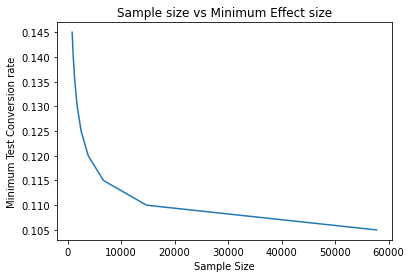

In [5]:
import matplotlib.pyplot as plt

possible_p2 = [0.1 + 0.005*x for x in range(1, 10)]

sample_size = []
for p2 in possible_p2:
    p1_and_p2 = sms.proportion_effectsize(0.1, p2)
    sample_size.append(sms.NormalIndPower().solve_power(p1_and_p2, power=0.8, alpha=0.05))

plt.plot(sample_size, possible_p2)
plt.title("Sample size vs Minimum Effect size")
plt.xlabel("Sample Size")
plt.ylabel("Minimum Test Conversion rate")
plt.show()

as we increase p2, the required sample size goes down quickly. It makes sense. If we are looking for a very small gain, we need a lot of data to find it. But if we are looking for a huge gain like from 10% to 15% conversion rate, few data will be enough to check if that’s happening or not.

Finally, now that you know how many people you need in test and control, you can figure out for how many days you need to run the test based on your daily traffic.
 
A widely used approach to this is:
 
* If you need more than 2 weeks to collect that many people, just split the traffic 50/50 and run it until you have the required sample size
 
* Otherwise, still run it for two weeks to be able to reliably capture weekly patterns. But test it on the smallest percentage of users that would allow to collect enough data in 2 weeks


## Determine test duration:

Let’s assume our site has 1K visitors per day. We found out we need ~15K users in both test and control to detect an improvement of at least +1%. So we would split the traffic 50/50 for test and control. Each day we would have 500 users in test and 500 in control. And we would run the test for 1 month, i.e. 30*500 = 15K
 

Let’s assume our site has 100K visitors per day. By splitting test and control 50/50, we would get all users we need in 1 day. But that would be too noisy, Sunday is different from Monday. And if we ran it for two weeks with a 50/50 split, we would collect way more data than we need. And that’s also not efficient, after all we could use that traffic to test other things. 

So we do the following. We want to have 15K people in two weeks. That means ~1K people per day. Since we have 100K daily visitors, 1% of our users will enter the test and see the different version of the site. Because of this, large companies typically run tests on 1% or less of their users
